# Data Visualization Project

In [1]:
# Standard libraries
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Library for reading stock data from yahoo
import pandas_datareader.data as web

# For time stamps
import time
from datetime import datetime
from dateutil.relativedelta import relativedelta

# For division
from __future__ import division

In [2]:
# Ignore warning
import warnings
warnings.filterwarnings('ignore')

## Download data from Yahoo! Stock

In [3]:
# Download stocks from Apple, Walmart, Google, Microsoft and Amazon
tech_list = ['AAPL', 'MSFT']

# Set up End and Start times and interval for data grab
end = int(round(datetime.today().timestamp()))
start = int(round((datetime.today() + relativedelta(years=-1)).timestamp()))
interval = '1d'

# For loop for grabing yahoo data and setting as a dataframe
for ticker in tech_list: 
    # URL for querying the data
    url_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={start}&period2={end}&interval={interval}&events=history&includeAdjustedClose=true'
    # Set DataFrame as the Stock Ticker
    globals()[ticker] = pd.read_csv(url_string).set_index('Date')

## Baseline Analyses

### Apple Stocks

In [4]:
# Check the dataframe
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-21,133.800003,139.669998,133.589996,136.869995,136.031387,120150900
2021-01-22,136.279999,139.850006,135.020004,139.070007,138.217911,114459400
2021-01-25,143.070007,145.089996,136.539993,142.919998,142.044312,157611700
2021-01-26,143.600006,144.300003,141.369995,143.160004,142.282852,98390600
2021-01-27,143.429993,144.300003,140.410004,142.059998,141.189590,140843800


In [5]:
# Summary statistics
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,143.093242,144.589921,141.672213,143.178459,142.840452,8.973493e+07
std,15.956822,16.248303,15.829490,16.028055,16.212816,2.864348e+07
min,119.029999,120.400002,116.209999,116.360001,115.819870,4.100000e+07
25%,129.940002,130.889999,128.800003,130.210007,129.765900,6.902310e+07
50%,143.429993,144.449997,141.690002,142.940002,142.691742,8.450580e+07
75%,149.820007,151.419998,148.699997,149.990005,149.801376,1.055755e+08
max,182.630005,182.940002,179.119995,182.009995,182.009995,1.954327e+08


In [6]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 2021-01-21 to 2022-01-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8+ KB


<AxesSubplot:xlabel='Date'>

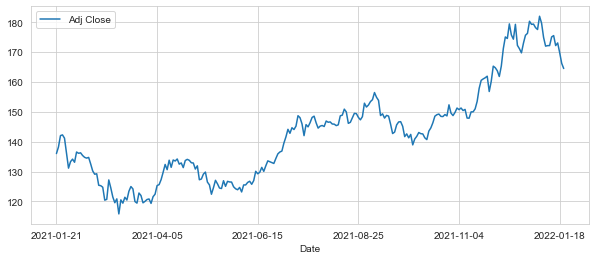

In [7]:
# Plot a historical view of the closing price
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

The graph shows the closing price of Apple stocks has significantly increased over time.

<AxesSubplot:xlabel='Date'>

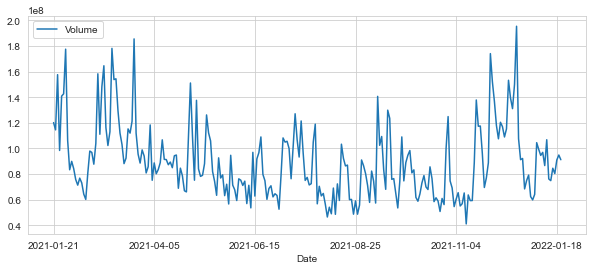

In [8]:
# Plot the total volume of stock being traded each day over the past year
AAPL['Volume'].plot(legend=True, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

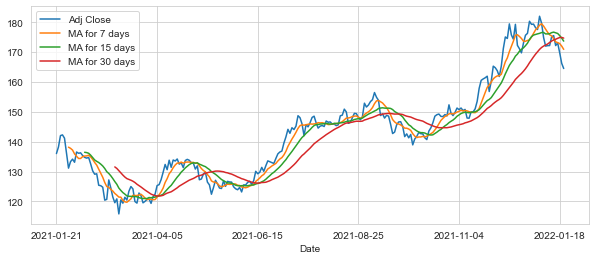

In [9]:
# Calculate the moving average (7, 15, and 30 days)
ma_day = [7, 15, 30]

for ma in ma_day:
    # Add columns of moving average for each period into the dataframe
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

AAPL[['Adj Close','MA for 7 days','MA for 15 days','MA for 30 days']].plot(subplots=False,figsize=(10,4))

### Microsoft Stocks

In [11]:
# Check the dataframe
MSFT.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-21,224.699997,226.300003,222.419998,224.970001,223.099915,30709400
2021-01-22,227.080002,230.070007,225.800003,225.949997,224.071747,30172700
2021-01-25,229.119995,229.779999,224.220001,229.529999,227.622009,33152100
2021-01-26,231.860001,234.179993,230.080002,232.330002,230.398743,49169600
2021-01-27,238.000000,240.440002,230.139999,232.899994,230.963989,69870600


In [12]:
# Summary statistics
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,280.568221,282.969842,278.154980,280.688814,279.782870,2.649164e+07
std,35.450207,35.623233,34.979190,35.318741,35.831422,8.481111e+06
min,224.699997,226.300003,222.419998,224.970001,223.099915,1.390020e+07
25%,247.759995,249.860001,245.820007,247.789993,246.376724,2.016800e+07
50%,282.350006,286.420013,280.549988,282.510010,281.455292,2.476100e+07
75%,305.019989,309.399994,302.690002,304.820007,304.662628,3.042760e+07
max,344.619995,349.670013,342.200012,343.109985,343.109985,6.987060e+07


In [13]:
# General Info
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 2021-01-21 to 2022-01-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8+ KB


<AxesSubplot:xlabel='Date'>

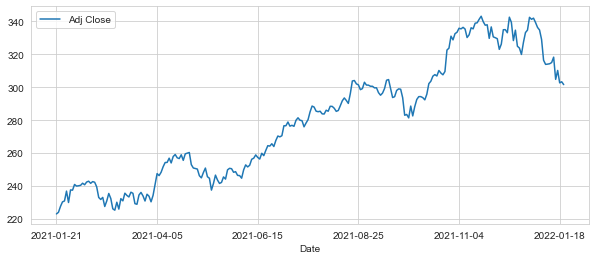

In [14]:
# Plot a historical view of the closing price
MSFT['Adj Close'].plot(legend=True, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

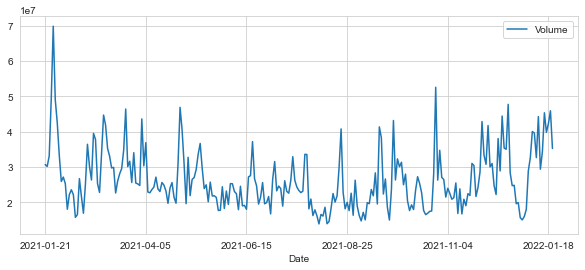

In [15]:
# Plot the total volume of stock being traded each day over the past year
MSFT['Volume'].plot(legend=True, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

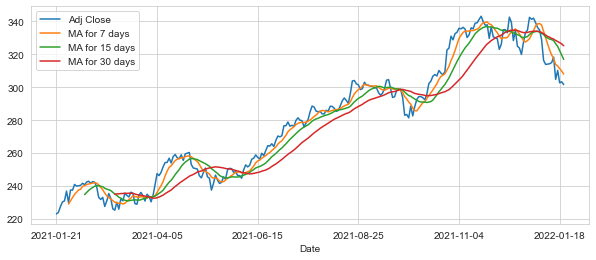

In [16]:
# Calculate the moving average (7, 15, and 30 days)
ma_day = [7, 15, 30]

for ma in ma_day:
    # Add columns of moving average for each period into the dataframe
    column_name = "MA for %s days" %(str(ma))
    MSFT[column_name] = MSFT['Adj Close'].rolling(ma).mean()

MSFT[['Adj Close','MA for 7 days','MA for 15 days','MA for 30 days']].plot(subplots=False,figsize=(10,4))

## Daily Return Analysis

### Apple Stocks

<AxesSubplot:xlabel='Date'>

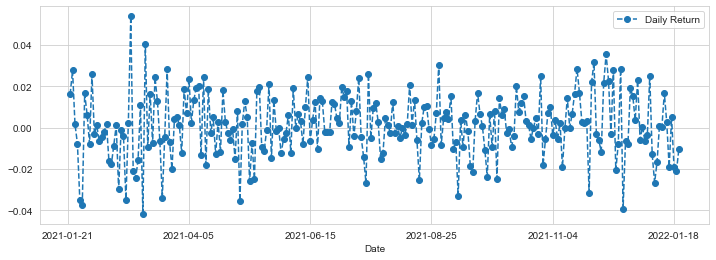

In [17]:
# Calculate the percent change of the stock each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

# Plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

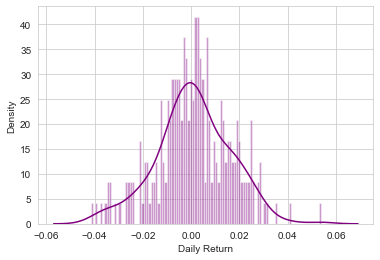

In [18]:
# Jointplot for daily return using seaborn
# NaN values can't be read by seaborn, therefore NaN value will be dropped
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

### Microsoft Stocks

<AxesSubplot:xlabel='Date'>

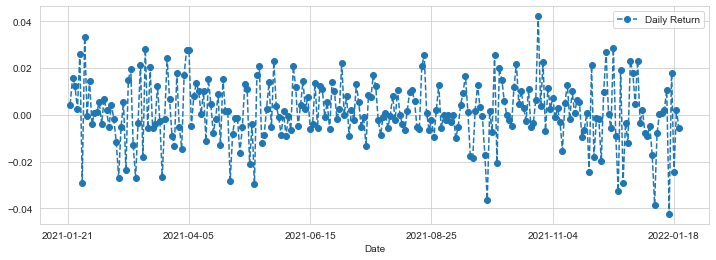

In [19]:
# Calculate the percent change of the stock each day
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()

# Plot the daily return percentage
MSFT['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

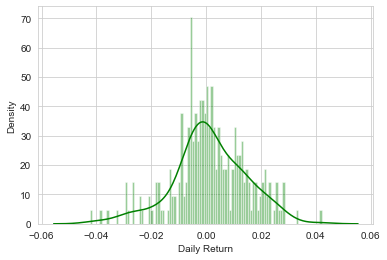

In [21]:
# Jointplot for daily return using seaborn
sns.distplot(MSFT['Daily Return'].dropna(), bins=100, color='green')